In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [116]:
file_path = '../../data/dataS.csv'
df = pd.read_csv(file_path, parse_dates=['Date'])
#df = df.dropna()

#df = df[df['volatility_forcast'] <= 3]
#df = df[df['volatility'] <= 3]

df.head()

,Date,Open,High,Low,Close,SP500_Adj_Close,move,Volume,volatility,volatility_forcast,returns,GARCH_VM
0,2003-01-03,0.0477,0.0030,0.0015,0.0005,0.0482,1,0.0698,0.0668,0.2115,0.5843,0.0472
1,2003-01-06,0.0476,0.0014,0.0027,0.0049,0.0525,0,0.0973,0.2115,0.0912,0.6219,0.0377
2,2003-01-07,0.0518,0.0030,0.0009,0.0006,0.0512,0,0.1071,0.0912,0.1286,0.5742,0.0319
3,2003-01-08,0.0505,0.0033,0.0002,0.0020,0.0485,1,0.1001,0.1286,0.1648,0.5617,0.0256
4,2003-01-09,0.0478,0.0005,0.0028,0.0044,0.0522,0,0.1085,0.1648,0.1331,0.6169,0.0212


In [117]:
vol_values = df['volatility'].values
n_blocks = len(vol_values) // 10
vol_values = vol_values[:n_blocks * 10]
vol_matrix = vol_values.reshape(n_blocks, 10)
vol_df = pd.DataFrame(vol_matrix, columns=[f'day_{i+1}' for i in range(10)])
vol_df.head()

,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10
0,0.0668,0.2115,0.0912,0.1286,0.1648,0.1331,0.1111,0.0820,0.1396,0.1226
1,0.1395,0.1692,0.1084,0.1211,0.2697,0.1923,0.1249,0.2248,0.2137,0.1754
2,0.0790,0.1978,0.1910,0.1030,0.1896,0.1327,0.1782,0.1336,0.1503,0.2014
3,0.1765,0.1169,0.1218,0.2071,0.1563,0.2128,0.1299,0.1427,0.0892,0.1941
4,0.1313,0.1039,0.0944,0.1857,0.2305,0.1404,0.1576,0.2914,0.1265,0.3658


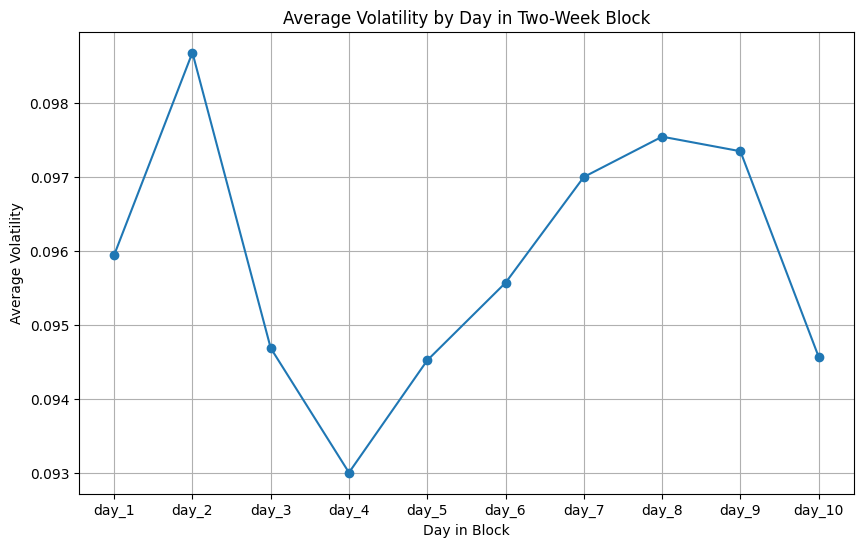

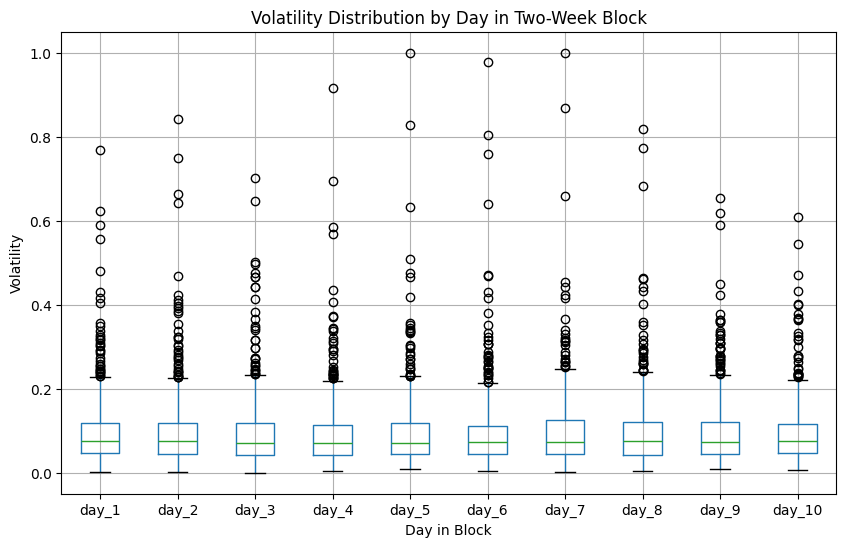

In [118]:
mean_volatility = vol_df.mean()

plt.figure(figsize=(10, 6))
plt.plot(mean_volatility.index, mean_volatility.values, marker='o', linestyle='-')
plt.title('Average Volatility by Day in Two-Week Block')
plt.xlabel('Day in Block')
plt.ylabel('Average Volatility')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
vol_df.boxplot()
plt.title('Volatility Distribution by Day in Two-Week Block')
plt.xlabel('Day in Block')
plt.ylabel('Volatility')
plt.show()


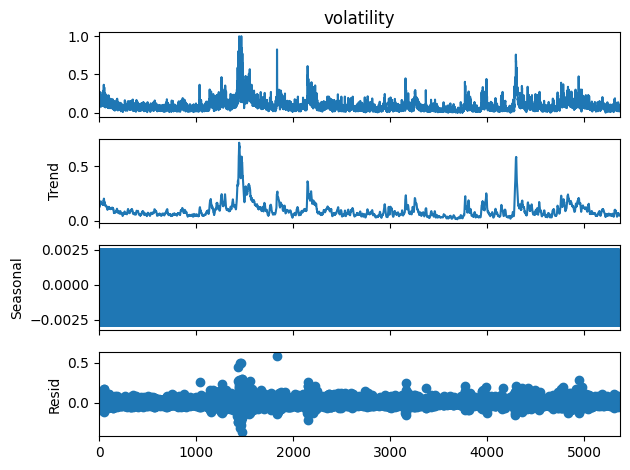

In [119]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['volatility'], model='additive', period=10)

decomposition.plot()
plt.tight_layout()
plt.show()


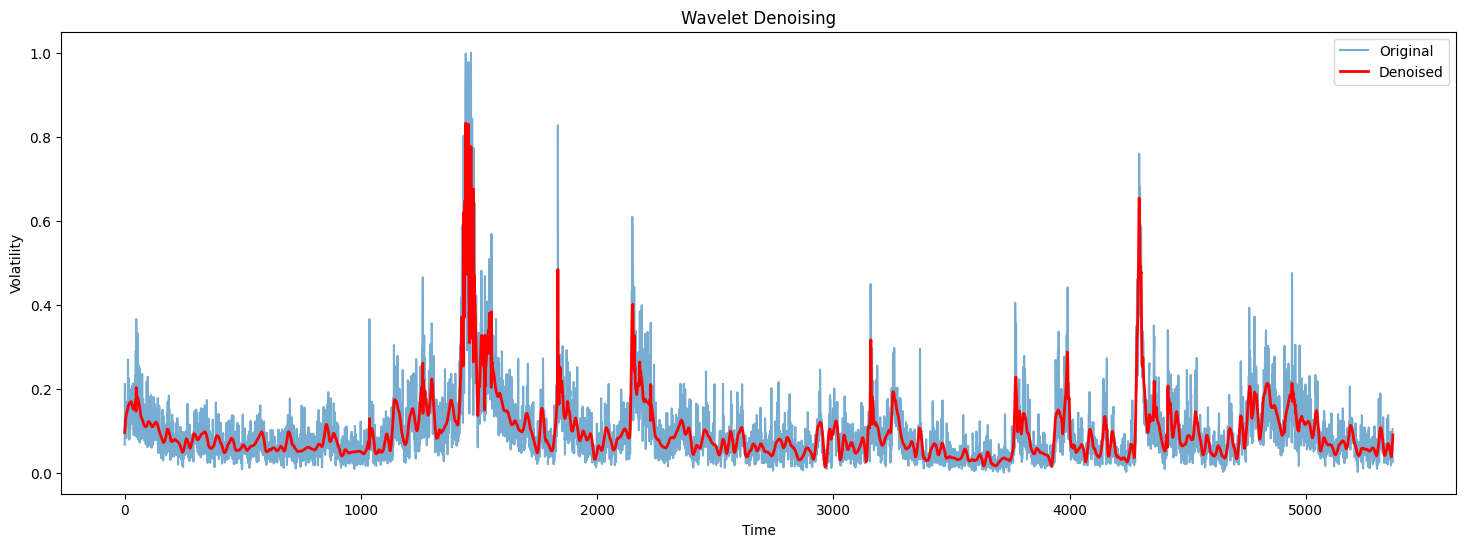

In [120]:
import pywt

def wavelet_denoise(signal, wavelet='db4', level=4):
    coeffs = pywt.wavedec(signal, wavelet, mode='per', level=level)
    
    sigma = np.median(np.abs(coeffs[-1])) / 0.6745
    uthresh = sigma * np.sqrt(2 * np.log(len(signal)))
    
    # Apply soft thresholding to detail coefficients (skip the approximation coeff)
    thresholded_coeffs = [coeffs[0]]  
    for detail in coeffs[1:]:
        thresholded_detail = pywt.threshold(detail, value=uthresh, mode='soft')
        thresholded_coeffs.append(thresholded_detail)
    
    # Reconstruct the denoised signal from the thresholded coefficients
    denoised_signal = pywt.waverec(thresholded_coeffs, wavelet, mode='per')
    
    return denoised_signal

signal = df['volatility'].values
denoised_signal = wavelet_denoise(signal, wavelet='db4', level=4)

plt.figure(figsize=(18, 6))
plt.plot(signal, label='Original', alpha=0.6)
plt.plot(denoised_signal, label='Denoised', color='red', linewidth=2)
plt.legend()
plt.title("Wavelet Denoising")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.show()


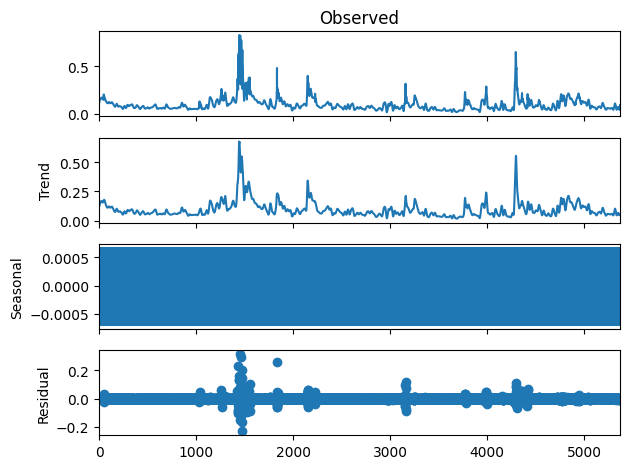

In [121]:

decomposition = seasonal_decompose(denoised_signal, model='additive', period=10)

decomposition.plot()
plt.tight_layout()
plt.show()
